<a href="https://colab.research.google.com/github/sk-aili/market-basket-analysis/blob/main/Data_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recommender System - Data Processing


**Importing libraries**

In [31]:
! pip install squarify gapminder --quiet

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import networkx as nx
import matplotlib as mpl
import gapminder as gapminder

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

## Data Collection

In [2]:
customer = pd.read_csv("/content/customer.csv")
print("Customer data")

product = pd.read_csv("/content/product.csv")
print("Product data")

prod_class = pd.read_csv("/content/product_class.csv")
print("Product Class data")

region = pd.read_csv("/content/region.csv")
print("Region data")

sales = pd.read_csv("/content/sales.csv")
print("Sales data")

store = pd.read_csv("/content/store.csv")
print("Store data")

time = pd.read_csv("/content/time_by_day.csv")
print("Time data")




Customer data
Product data
Product Class data
Region data
Sales data
Store data
Time data


**Customer Data**

In [3]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10281 entries, 0 to 10280
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customer_id           10281 non-null  int64 
 1   city                  10281 non-null  object
 2   state_province        10281 non-null  object
 3   country               10281 non-null  object
 4   customer_region_id    10281 non-null  int64 
 5   yearly_income         10281 non-null  object
 6   gender                10281 non-null  object
 7   total_children        10281 non-null  int64 
 8   num_children_at_home  10281 non-null  int64 
 9   education             10281 non-null  object
 10  date_accnt_opened     10281 non-null  object
 11  member_card           10281 non-null  object
 12  occupation            10281 non-null  object
 13  houseowner            10281 non-null  object
 14  num_cars_owned        10281 non-null  int64 
dtypes: int64(5), object(10)
memory usage

Comments: No missing data in Customer (10281 rows, 15 columns)

**Product Data**

In [4]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_class_id    1560 non-null   int64  
 1   product_id          1560 non-null   int64  
 2   brand_name          1560 non-null   object 
 3   product_name        1560 non-null   object 
 4   SKU                 1560 non-null   int64  
 5   SRP                 1560 non-null   float64
 6   gross_weight        1560 non-null   float64
 7   net_weight          1560 non-null   float64
 8   recyclable_package  1560 non-null   int64  
 9   low_fat             1560 non-null   int64  
 10  units_per_case      1560 non-null   int64  
 11  cases_per_pallet    1560 non-null   int64  
 12  shelf_width         1560 non-null   float64
 13  shelf_height        1560 non-null   float64
 14  shelf_depth         1560 non-null   float64
dtypes: float64(6), int64(7), object(2)
memory usage: 182.9+

Comments: No missing data in Product (1560 rows, 15 columns).

**Product Class data**

In [5]:
prod_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   product_class_id  108 non-null    int64 
 1   subcategory       108 non-null    object
 2   category          108 non-null    object
 3   department        108 non-null    object
 4   family            108 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.3+ KB


Comments: No missing data in Product Class (108 rows, 5 columns)

**Region Data**

In [6]:
region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   region_id             110 non-null    int64 
 1   sales_city            110 non-null    object
 2   sales_state_province  110 non-null    object
 3   sales_district        110 non-null    object
 4   sales_region          110 non-null    object
 5   sales_country         110 non-null    object
 6   sales_district_id     110 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 6.1+ KB


Comments: No missing data in region (110 rows, 7 columns)

**Sales data**

In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269720 entries, 0 to 269719
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   product_id   269720 non-null  int64  
 1   time_id      269720 non-null  int64  
 2   customer_id  269720 non-null  int64  
 3   store_id     269720 non-null  int64  
 4   store_sales  269720 non-null  float64
 5   store_cost   269720 non-null  float64
 6   unit_sales   269720 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 14.4 MB


Comments: No missing data in Sales (270K rows, 7 columns)

**Store data**

In [8]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   store_id              25 non-null     int64 
 1   store_type            25 non-null     object
 2   region_id             25 non-null     int64 
 3   store_name            25 non-null     object
 4   store_number          25 non-null     int64 
 5   store_street_address  25 non-null     object
 6   store_city            25 non-null     object
 7   store_state           25 non-null     object
 8   store_postal_code     25 non-null     int64 
 9   store_country         25 non-null     object
 10  store_manager         25 non-null     object
 11  store_phone           25 non-null     object
 12  store_fax             25 non-null     object
 13  first_opened_date     25 non-null     object
 14  last_remodel_date     25 non-null     object
 15  store_sqft            25 non-null     int6

Comments: No missing data in store (25 rows, 24 columns)

**time data**

In [9]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   time_id          1461 non-null   int64 
 1   the_date         1461 non-null   object
 2   the_day          1461 non-null   object
 3   the_year         1461 non-null   int64 
 4   the_month        1461 non-null   int64 
 5   day_of_month     1461 non-null   int64 
 6   day_since_epoch  1461 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 80.0+ KB


Comments: No missing data in time (1461 rows, 7 columns)

**Merge Data**

In [10]:
df=sales.merge(customer,on='customer_id')
df=df.merge(product,on='product_id')
df=df.merge(prod_class,on='product_class_id')
df=df.merge(store,on='store_id')
df=df.merge(region,on='region_id')
df=df.merge(time,on='time_id')

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 269720 entries, 0 to 269719
Data columns (total 74 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   product_id            269720 non-null  int64  
 1   time_id               269720 non-null  int64  
 2   customer_id           269720 non-null  int64  
 3   store_id              269720 non-null  int64  
 4   store_sales           269720 non-null  float64
 5   store_cost            269720 non-null  float64
 6   unit_sales            269720 non-null  int64  
 7   city                  269720 non-null  object 
 8   state_province        269720 non-null  object 
 9   country               269720 non-null  object 
 10  customer_region_id    269720 non-null  int64  
 11  yearly_income         269720 non-null  object 
 12  gender                269720 non-null  object 
 13  total_children        269720 non-null  int64  
 14  num_children_at_home  269720 non-null  int64  
 15  

Comments: No missing data in the merged data (270K rows, 74 columns)

## Data Understanding

In [15]:
df.dtypes.value_counts()

object     34
int64      32
float64     8
dtype: int64

In [16]:
df.describe(include=['O'])

,city,state_province,country,yearly_income,gender,education,date_accnt_opened,member_card,occupation,houseowner,...,store_fax,first_opened_date,last_remodel_date,sales_city,sales_state_province,sales_district,sales_region,sales_country,the_date,the_day
count,269720,269720,269720,269720,269720,269720,269720,269720,269720,269720,...,269720,269720,269720,269720,269720,269720,269720,269720,269720,269720
unique,107,12,3,8,2,5,1633,4,5,2,...,24,24,24,23,10,21,7,3,673,7
top,Hidalgo,WA,USA,$30K - $50K,F,Partial High School,16/10/93,Bronze,Professional,Y,...,977-555-2721,13/4/1957 0:00,10/11/1997 0:00,Salem,WA,Los Angeles,North West,USA,1998-12-07,Thursday
freq,16684,86855,180823,88422,136181,81536,954,151261,87867,163137,...,25865,25865,25865,25865,86855,31501,130006,180823,1377,40685


In [18]:
temp = pd.DataFrame(index=df.columns.sort_values())
temp['data_type']=df.dtypes
temp['null_count']=df.isnull().sum()
temp['unique_count']=df.nunique()
temp

,data_type,null_count,unique_count
SKU,int64,0,1559
SRP,float64,0,315
brand_name,object,0,111
cases_per_pallet,int64,0,10
category,object,0,45
...,...,...,...
total_children,int64,0,6
unit_sales,int64,0,6
units_per_case,int64,0,36
video_store,int64,0,2


## Univariate Analysis

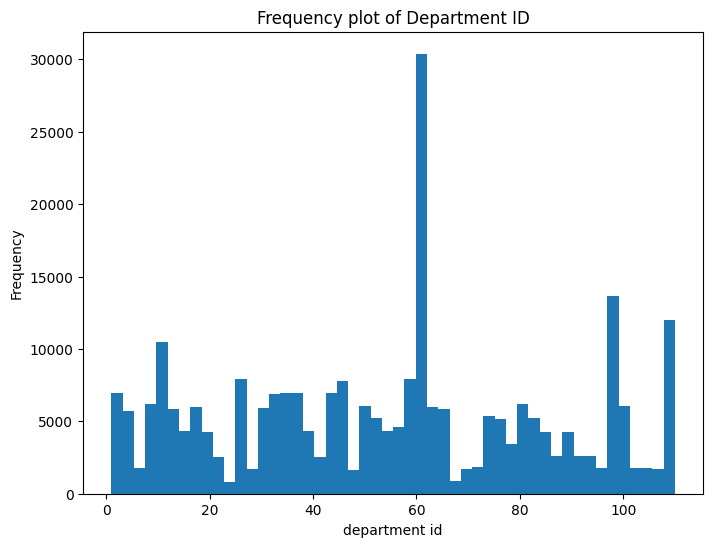

In [26]:
fig=plt.figure(figsize=(8,6))
df['product_class_id'].plot.hist(bins = 50)
plt.title("Frequency plot of Department ID")
plt.xlabel('department id')
plt.ylabel('Frequency')
plt.show()

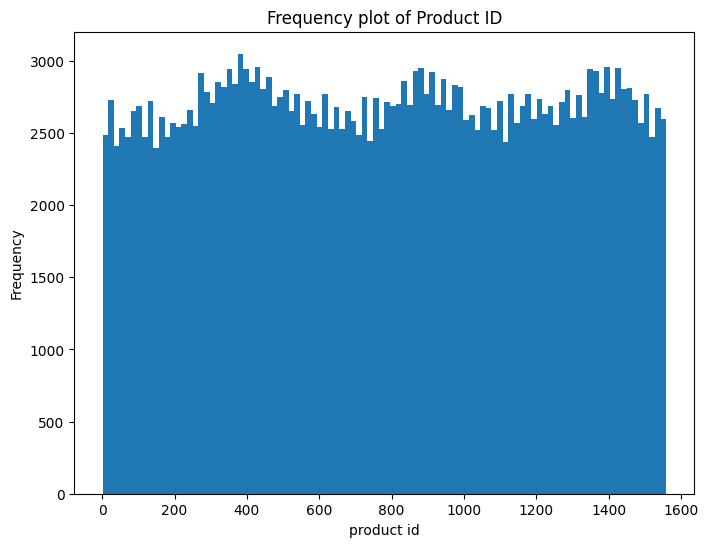

In [25]:
fig=plt.figure(figsize=(8,6))
df['product_id'].plot.hist(bins = 100)
plt.title("Frequency plot of Product ID")
plt.xlabel('product id')
plt.ylabel('Frequency')
plt.show()

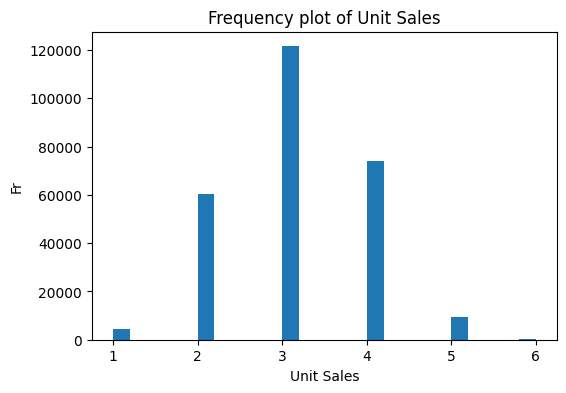

In [24]:
fig=plt.figure(figsize=(6,4))
df['unit_sales'].plot.hist(bins = 25)
plt.title("Frequency plot of Unit Sales")
plt.xlabel('Unit Sales')
plt.ylabel("Fr")
plt.show()

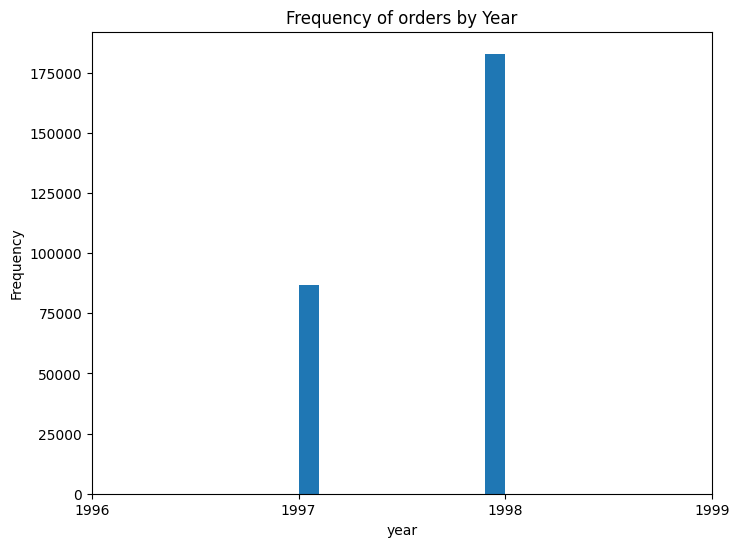

In [23]:
fig=plt.figure(figsize=(8, 6))
df['the_year'].plot.hist(bins=10)
plt.title("Frequency of orders by Year")
plt.xlabel('year')
plt.xticks([1996,1997,1998,1999])
plt.ylabel("Frequency")
plt.show()

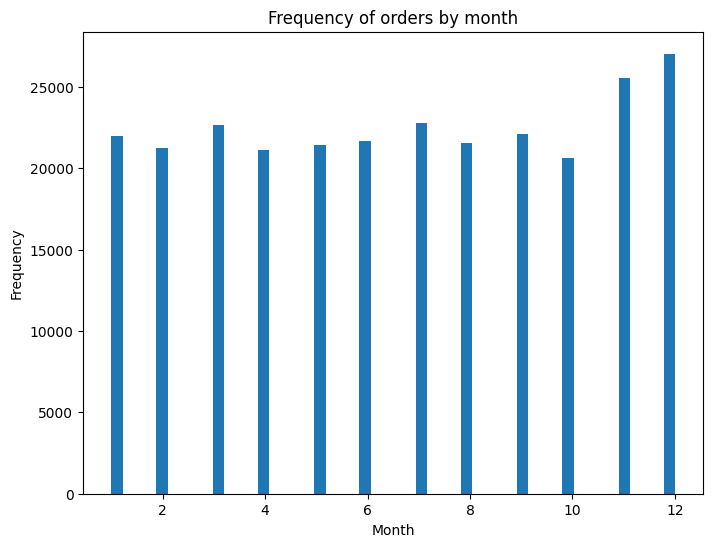

In [27]:
## When does people order?
fig=plt.figure(figsize=(8,6))
df['the_month'].plot.hist(bins=50)
plt.title('Frequency of orders by month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()

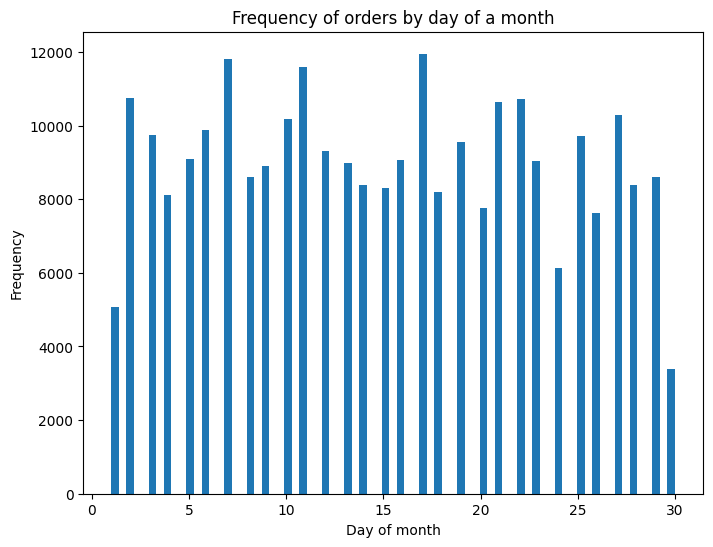

In [28]:
fig=plt.figure(figsize=(8,6))
df['day_of_month'].plot.hist(bins=75)
plt.title("Frequency of orders by day of a month")
plt.xlabel('Day of month')
plt.ylabel('Frequency')
plt.show()

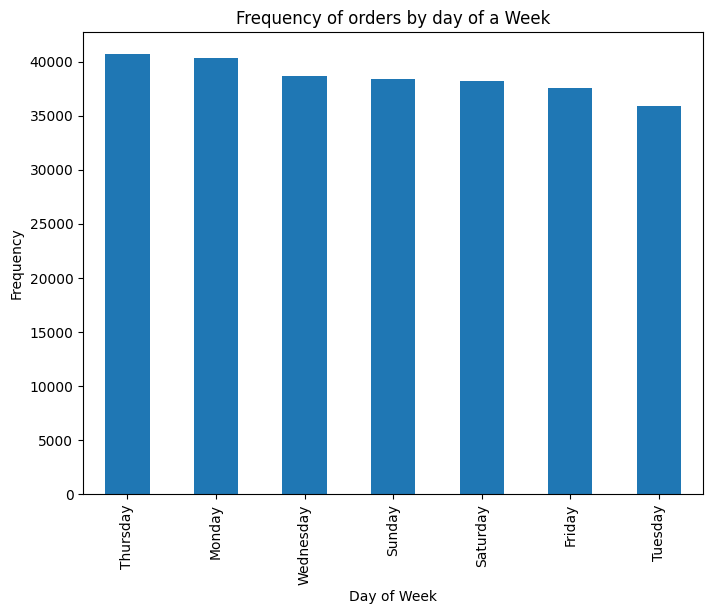

In [29]:
df_day_freq=df['the_day'].value_counts()
fig=plt.figure(figsize=(8, 6))
df_day_freq.plot.bar()
plt.title("Frequency of orders by day of a Week")
plt.xlabel('Day of Week')
plt.ylabel('Frequency')
plt.show()

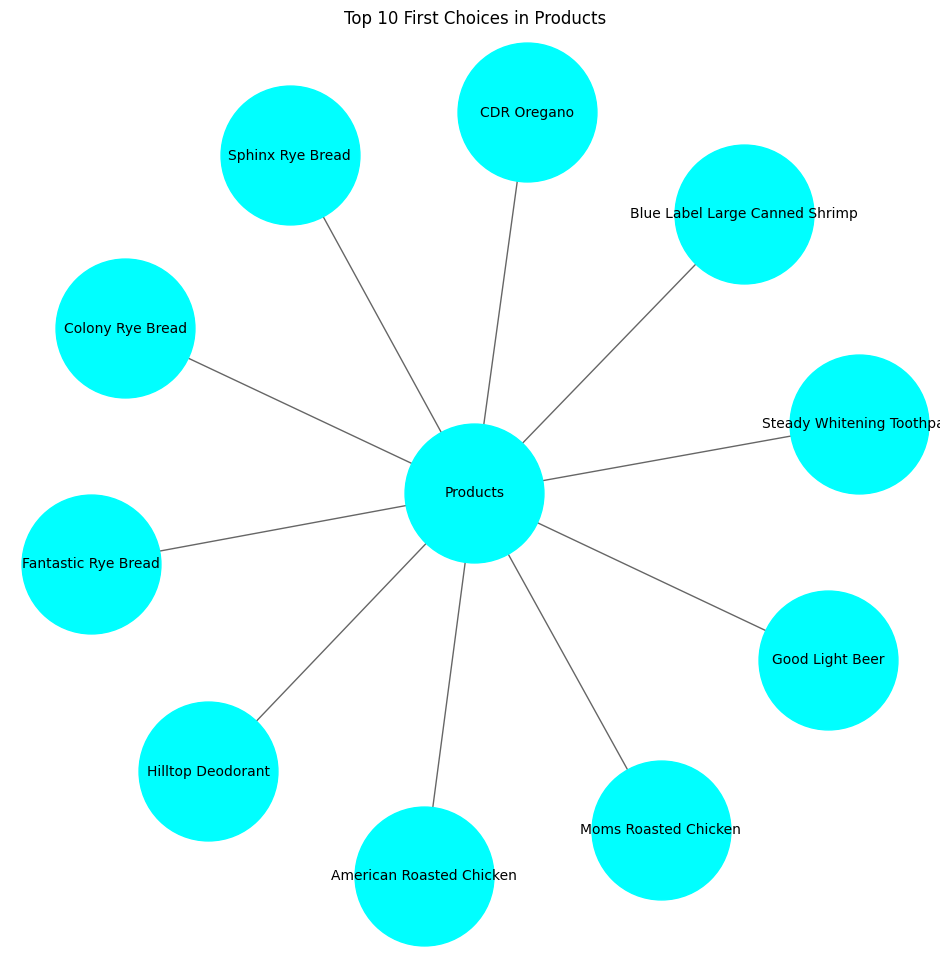

In [42]:
df['products'] = 'Products'
products = df.truncate(before = 605, after = 615)
products = nx.from_pandas_edgelist(products, source = 'products', target = 'product_name', edge_attr = True)
plt.rcParams['figure.figsize']=(12, 12)
pos=nx.spring_layout(products)
nx.draw_networkx_nodes(products,pos,node_size=10000,node_color='cyan')
nx.draw_networkx_edges(products, pos, width = 1, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(products, pos, font_size = 10)
plt.axis('off')
plt.grid()
plt.title('Top 10 First Choices in Products')
plt.show()

In [34]:
## What are the most ordered products?
# df['product_name'].value_counts()
df['product_name'].value_counts().head(10)/len(df)*100

Moms Roasted Chicken                     0.083420
Tell Tale Fresh Lima Beans               0.081195
Steady Whitening Toothpast               0.080825
Hilltop Silky Smooth Hair Conditioner    0.080083
Steady Childrens Cold Remedy             0.079342
Nationeel Dried Apples                   0.079342
Sunset Economy Toilet Brush              0.078971
Hilltop Mint Mouthwash                   0.078971
Ebony Mixed Nuts                         0.078971
Special Wheat Puffs                      0.078600
Name: product_name, dtype: float64

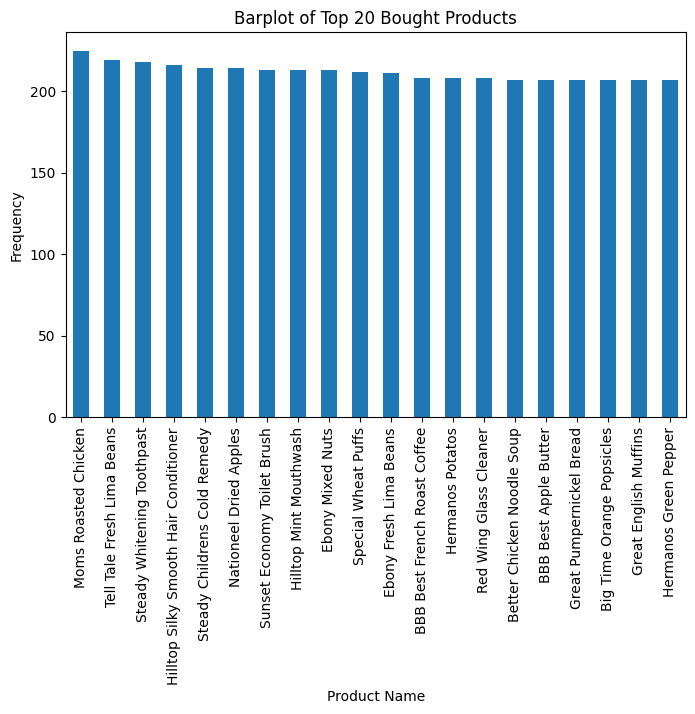

In [35]:
df_freq_products=df['product_name'].value_counts().iloc[:20]
fig=plt.figure(figsize=(8, 5))
df_freq_products.plot.bar()
plt.title("Barplot of Top 20 Bought Products")
plt.xlabel("Product Name")
plt.ylabel("Frequency")
plt.show()

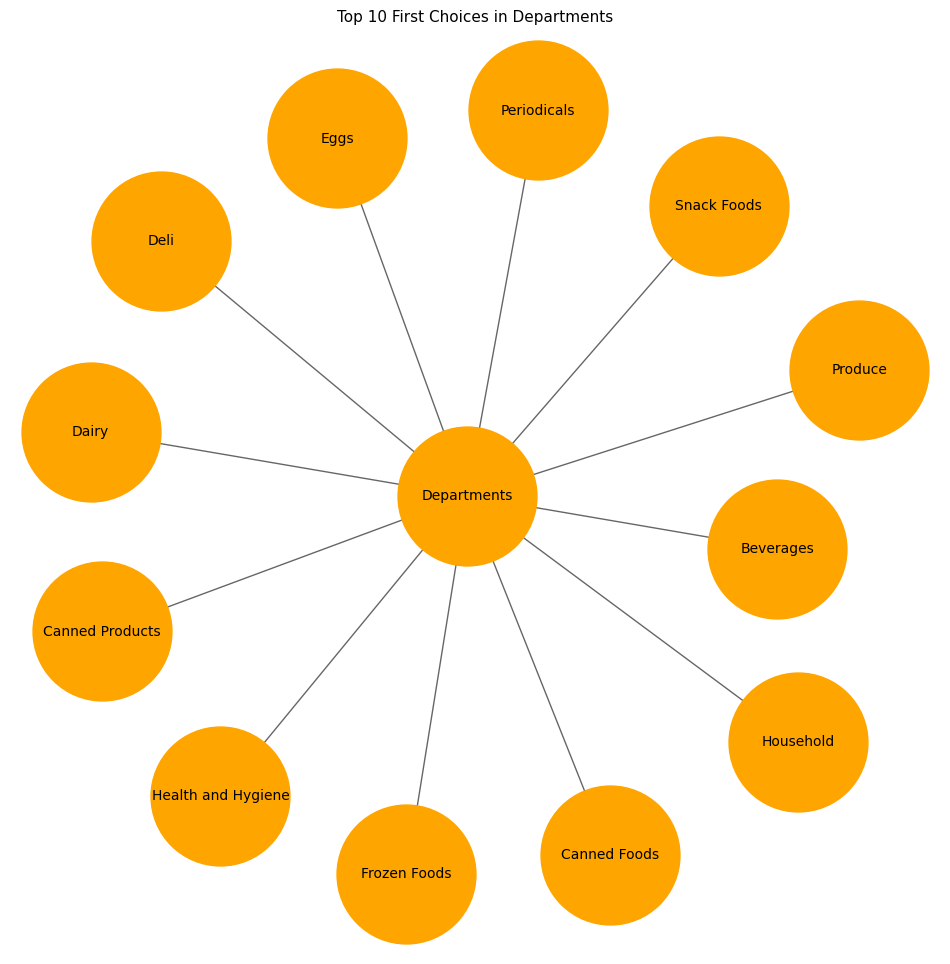

In [38]:
df['departments'] = 'Departments'
departments = df.truncate(before = 150, after = 195)
departments = nx.from_pandas_edgelist(departments, source = 'departments', target = 'department', edge_attr = True)
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(12,12)
pos=nx.spring_layout(departments)
nx.draw_networkx_nodes(departments,pos,node_size=10000,node_color='orange')
nx.draw_networkx_edges(departments, pos, width = 1, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(departments, pos, font_size = 10)
plt.axis('off')
plt.grid()
plt.title('Top 10 First Choices in Departments', fontsize = 11)
plt.show()

In [43]:
## what are the most visited departments?
# df['department'].value_counts()
df['department'].value_counts().head(10)/len(df)*100

Produce               14.103886
Snack Foods           11.487098
Household             10.229127
Frozen Foods          10.025953
Baking Goods           7.627540
Canned Foods           7.077710
Dairy                  6.375130
Health and Hygiene     6.170473
Beverages              5.051164
Deli                   4.497256
Name: department, dtype: float64

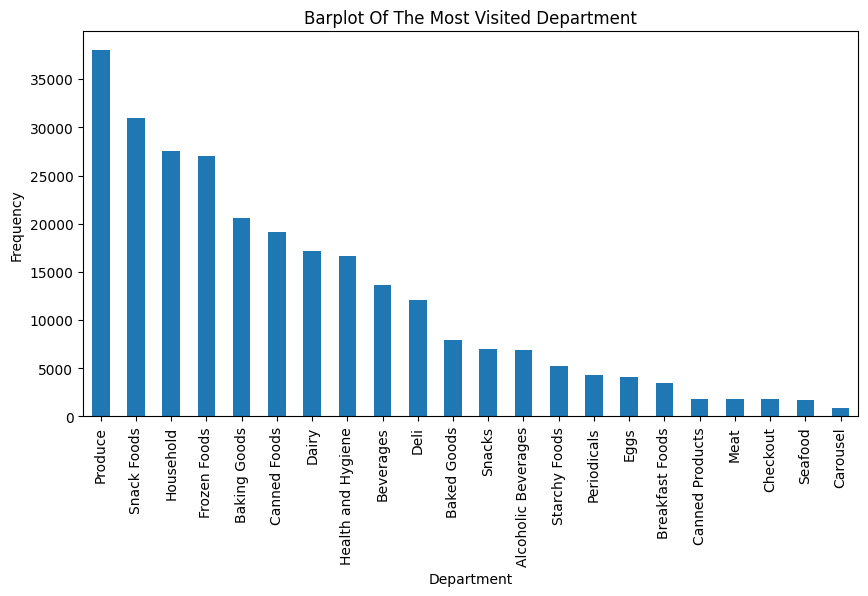

In [45]:
fig=plt.figure(figsize=(10,5))
df['department'].value_counts().plot(kind='bar')
plt.title("Barplot Of The Most Visited Department")
plt.xlabel("Department")
plt.ylabel("Frequency")
plt.show()

In [46]:
## what are the most visited aisle?
# df['subcategory'].value_counts()
df['subcategory'].value_counts().head(10)/len(df)*100

Fresh Vegetables     7.733576
Fresh Fruit          4.438677
Soup                 2.936008
Cheese               2.897449
Dried Fruit          2.876316
Cookies              2.569331
Wine                 1.923847
Paper Wipes          1.901231
Canned Vegetables    1.887884
Frozen Vegetables    1.644298
Name: subcategory, dtype: float64

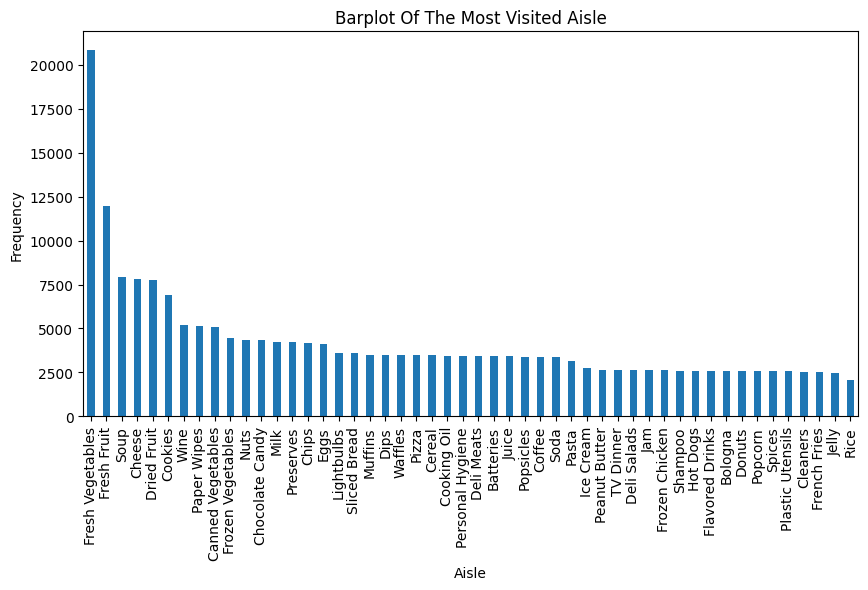

In [47]:
df_subcategory_freq=df['subcategory'].value_counts().iloc[:50]
fig=plt.figure(figsize=(10,5))
df_subcategory_freq.plot.bar()
plt.title("Barplot Of The Most Visited Aisle")
plt.xlabel('Aisle')
plt.ylabel('Frequency')
plt.show()

**Array of Most Bought Product**

In [48]:
y=df_freq_products.head(50).to_frame()
y.index

Index(['Moms Roasted Chicken', 'Tell Tale Fresh Lima Beans',
       'Steady Whitening Toothpast', 'Hilltop Silky Smooth Hair Conditioner',
       'Steady Childrens Cold Remedy', 'Nationeel Dried Apples',
       'Sunset Economy Toilet Brush', 'Hilltop Mint Mouthwash',
       'Ebony Mixed Nuts', 'Special Wheat Puffs', 'Ebony Fresh Lima Beans',
       'BBB Best French Roast Coffee', 'Hermanos Potatos',
       'Red Wing Glass Cleaner', 'Better Chicken Noodle Soup',
       'BBB Best Apple Butter', 'Great Pumpernickel Bread',
       'Big Time Orange Popsicles', 'Great English Muffins',
       'Hermanos Green Pepper'],
      dtype='object')

In [ ]:
df.shape

In [49]:
df.drop_duplicates()
df.shape

(269720, 76)

In [56]:
df.to_csv('cleandf.csv')

**Thank you**